## Plotly Tutorial

Author : https://github.com/derekbanas

### What is Plotly?

Plotly allows you to create over 40 beautiful interactive web-based visualizations that can be displayed in Jupyter notebooks or saved to HTML files. It is widely used to plot scientific, statistical and financial data. Plotly is free to use unless you want them to host your data for you.

### Installation

You can install using Anaconda under the environment tab by searching for Plotly. You'll also need Cufflinks and a few other packages that you can install by running : conda install -c conda-forge cufflinks-py in your command line or terminal. Also you can use the commands pip install plotly and pip install cufflinks. Cufflinks connects Plotly to Pandas.

### Import

In [1]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

### Basics

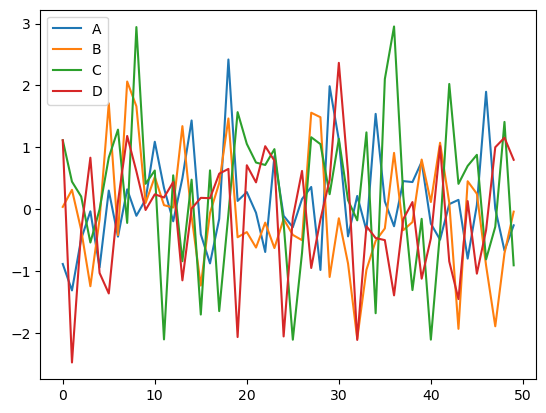

In [2]:
# Create a dataframe using a NumPy array that is 50 by 4
arr_1 = np.random.randn(50, 4)
df_1 = pd.DataFrame(arr_1, columns=['A','B','C','D'])
df_1.head()

# Compare old plots to a Plotly interactive plot
# You can save as PNG, Zoom, Pan, Turn off & on Data and more
df_1.plot()
df_1.iplot()

### Line Plots

In [3]:
# Allows us to create graph objects for making more customized plots
import plotly.graph_objects as go

# Use included Google price data to make one plot
df_stocks = px.data.stocks()
px.line(df_stocks, x='date', y='GOOG', labels={'x':'Date', 'y':'Price'})

# Make multiple line plots
px.line(df_stocks, x='date', y=['GOOG','AAPL'], labels={'x':'Date', 'y':'Price'},
       title='Apple Vs. Google')

# Create a figure to which I'll add plots
fig = go.Figure()
# You can pull individual columns of data from the dataset and use markers or not
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AAPL, 
                        mode='lines', name='Apple'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AMZN, 
                        mode='lines+markers', name='Amazon'))
# You can create custom lines (Dashes : dash, dot, dashdot)
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG, 
                        mode='lines+markers', name='Google',
                        line=dict(color='firebrick', width=2, dash='dashdot')))
# Further style the figure
# fig.update_layout(title='Stock Price Data 2018 - 2020',
#                    xaxis_title='Price', yaxis_title='Date')

# Go crazy styling the figure
fig.update_layout(
    # Shows gray line without grid, styling fonts, linewidths and more
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    # Turn off everything on y axis
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
    plot_bgcolor='white'
)

### Bar Charts

In [ ]:
# Get population change in US by querying for US data
df_us = px.data.gapminder().query("country == 'United States'")
px.bar(df_us, x='year', y='pop')

# Create a stacked bar with more customization
df_tips = px.data.tips()
px.bar(df_tips, x='day', y='tip', color='sex', title='Tips by Sex on Each Day',
      labels={'tip': 'Tip Amount', 'day': 'Day of the Week'})

# Place bars next to each other
px.bar(df_tips, x="sex", y="total_bill",
             color='smoker', barmode='group')

# Display pop data for countries in Europe in 2007 greater than 2000000
df_europe = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
fig = px.bar(df_europe, y='pop', x='country', text='pop', color='country')
# Put bar total value above bars with 2 values of precision
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# Set fontsize and uniformtext_mode='hide' says to hide the text if it won't fit
fig.update_layout(uniformtext_minsize=8)
# Rotate labels 45 degrees
fig.update_layout(xaxis_tickangle=-45)


### Scatter Plot

In [ ]:
# Use included Iris data set
df_iris = px.data.iris()
# Create a scatter plot by defining x, y, different color for count of provided
# column, size based on supplied column and additional data to display on hover
px.scatter(df_iris, x="sepal_width", y="sepal_length", color="species",
                 size='petal_length', hover_data=['petal_width'])

# Create a customized scatter with black marker edges with line width 2, opaque
# and colored based on width. Also show a scale on the right
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_iris.sepal_width, y=df_iris.sepal_length,
    mode='markers',
    marker_color=df_iris.sepal_width,
    text=df_iris.species,
    marker=dict(showscale=True)
))
fig.update_traces(marker_line_width=2, marker_size=10)

# Working with a lot of data use Scattergl
fig = go.Figure(data=go.Scattergl(
    x = np.random.randn(100000),
    y = np.random.randn(100000),
    mode='markers',
    marker=dict(
        color=np.random.randn(100000),
        colorscale='Viridis',
        line_width=1
    )
))
fig

### Pie Charts

In [6]:
# Create Pie chart of the largest nations in Asia
# Color maps here plotly.com/python/builtin-colorscales/
df_samer = px.data.gapminder().query("year == 2007").query("continent == 'Asia'")
px.pie(df_samer, values='pop', names='country', 
       title='Population of Asian continent', 
       color_discrete_sequence=px.colors.sequential.RdBu)

# Customize pie chart
colors = ['blue', 'green', 'black', 'purple', 'red', 'brown']
fig = go.Figure(data=[go.Pie(labels=['Water','Grass','Normal','Psychic', 'Fire', 'Ground'], 
                       values=[110,90,80,80,70,60])])
# Define hover info, text size, pull amount for each pie slice, and stroke
fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  textinfo='label+percent', pull=[0.1, 0, 0.2, 0, 0, 0],
                  marker=dict(colors=colors, line=dict(color='#FFFFFF', width=2)))

### Histograms

In [ ]:
# Plot histogram based on rolling 2 dice
dice_1 = np.random.randint(1,7,5000)
dice_2 = np.random.randint(1,7,5000)
dice_sum = dice_1 + dice_2
# bins represent the number of bars to make
# Can define x label, color, title
# marginal creates another plot (violin, box, rug)
fig = px.histogram(dice_sum, nbins=11, labels={'value':'Dice Roll'},
             title='5000 Dice Roll Histogram', marginal='violin',
            color_discrete_sequence=['green'])

fig.update_layout(
    xaxis_title_text='Dice Roll',
    yaxis_title_text='Dice Sum',
    bargap=0.2, showlegend=False
)

# Stack histograms based on different column data
df_tips = px.data.tips()
px.histogram(df_tips, x="total_bill", color="sex")

### Box Plots

In [ ]:
# A box plot allows you to compare different variables
# The box shows the quartiles of the data. The bar in the middle is the median 
# The whiskers extend to all the other data aside from the points that are considered
# to be outliers
df_tips = px.data.tips()
# We can see which sex tips the most, points displays all the data points
px.box(df_tips, x='sex', y='tip', points='all')

# Display tip sex data by day
px.box(df_tips, x='day', y='tip', color='sex')

# Adding standard deviation and mean
fig = go.Figure()
fig.add_trace(go.Box(x=df_tips.sex, y=df_tips.tip, marker_color='blue',
                    boxmean='sd'))

# Complex Styling
df_stocks = px.data.stocks()
fig = go.Figure()
# Show all points, spread them so they don't overlap and change whisker width
fig.add_trace(go.Box(y=df_stocks.GOOG, boxpoints='all', name='Google',
                    fillcolor='blue', jitter=0.5, whiskerwidth=0.2))
fig.add_trace(go.Box(y=df_stocks.AAPL, boxpoints='all', name='Apple',
                    fillcolor='red', jitter=0.5, whiskerwidth=0.2))
# Change background / grid colors
fig.update_layout(title='Google vs. Apple', 
                  yaxis=dict(gridcolor='rgb(255, 255, 255)',
                 gridwidth=3),
                 paper_bgcolor='rgb(243, 243, 243)',
                 plot_bgcolor='rgb(243, 243, 243)')

### Violin Plot

In [ ]:
# Violin Plot is a combination of the boxplot and KDE
# While a box plot corresponds to data points, the violin plot uses the KDE estimation
# of the data points
df_tips = px.data.tips()
px.violin(df_tips, y="total_bill", box=True, points='all')

# Multiple plots
px.violin(df_tips, y="tip", x="smoker", color="sex", box=True, points="all",
          hover_data=df_tips.columns)

# Morph left and right sides based on if the customer smokes
fig = go.Figure()
fig.add_trace(go.Violin(x=df_tips['day'][ df_tips['smoker'] == 'Yes' ],
                        y=df_tips['total_bill'][ df_tips['smoker'] == 'Yes' ],
                        legendgroup='Yes', scalegroup='Yes', name='Yes',
                        side='negative',
                        line_color='blue'))
fig.add_trace(go.Violin(x=df_tips['day'][ df_tips['smoker'] == 'No' ],
                        y=df_tips['total_bill'][ df_tips['smoker'] == 'No' ],
                        legendgroup='Yes', scalegroup='Yes', name='No',
                        side='positive',
                        line_color='red'))

### Density Heatmap

In [ ]:
# Create a heatmap using Seaborn data
flights = sns.load_dataset("flights")
flights

# You can set bins with nbinsx and nbinsy
fig = px.density_heatmap(flights, x='year', y='month', z='passengers', 
                         color_continuous_scale="Viridis")
fig

# You can add histograms
fig = px.density_heatmap(flights, x='year', y='month', z='passengers', 
                         marginal_x="histogram", marginal_y="histogram")
fig

### 3D Scatter Plots

In [ ]:
# Create a 3D scatter plot using flight data
fig = px.scatter_3d(flights, x='year', y='month', z='passengers', color='year',
                   opacity=0.7, width=800, height=400)
fig

### 3D Line Plots

In [ ]:
fig = px.line_3d(flights, x='year', y='month', z='passengers', color='year')
fig

### Scatter Matrix

In [ ]:
# With a scatter matrix we can compare changes when comparing column data
fig = px.scatter_matrix(flights, color='month')
fig

### Map Scatter Plots

In [ ]:
# There are many interesting ways of working with maps
# plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html
df = px.data.gapminder().query("year == 2007")
fig = px.scatter_geo(df, locations="iso_alpha",
                     color="continent", # which column to use to set the color of markers
                     hover_name="country", # column added to hover information
                     size="pop", # size of markers
                     projection="orthographic")
fig

### Choropleth Maps

In [ ]:
# You can color complex maps like we do here representing unemployment data

# Allows us to grab data from a supplied URL
from urllib.request import urlopen
# Used to decode JSON data
import json
# Grab US county geometry data
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

# Grab unemployment data based on each counties Federal Information Processing number
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

# Draw map using the county JSON data, color using unemployment values on a range of 12
fig = px.choropleth(df, geojson=counties, locations='fips', color='unemp',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           scope="usa",
                           labels={'unemp':'unemployment rate'}
                          )
fig

### Polar Chart

In [ ]:
# Polar charts display data radially 
# Let's plot wind data based on direction and frequency
# You can change size and auto-generate different symbols as well
df_wind = px.data.wind()
px.scatter_polar(df_wind, r="frequency", theta="direction", color="strength",
                size="frequency", symbol="strength")

# Data can also be plotted using lines radially
# A template makes the data easier to see
px.line_polar(df_wind, r="frequency", theta="direction", color="strength",
                line_close=True, template="plotly_dark", width=800, height=400)

### Ternary Plot

In [ ]:
# Used to represent ratios of 3 variables
df_exp = px.data.experiment()
px.scatter_ternary(df_exp, a="experiment_1", b="experiment_2", 
                   c='experiment_3', hover_name="group", color="gender")

### Facets

In [ ]:
# You can create numerous subplots
df_tips = px.data.tips()
px.scatter(df_tips, x="total_bill", y="tip", color="smoker", facet_col="sex")

# We can line up data in rows and columns
px.histogram(df_tips, x="total_bill", y="tip", color="sex", facet_row="time", facet_col="day",
       category_orders={"day": ["Thur", "Fri", "Sat", "Sun"], "time": ["Lunch", "Dinner"]})

# This dataframe provides scores for different students based on the level
# of attention they could provide during testing
att_df = sns.load_dataset("attention")
fig = px.line(att_df, x='solutions', y='score', facet_col='subject',
             facet_col_wrap=5, title='Scores Based on Attention')
fig

### Animated Plots

In [ ]:
# Create an animated plot that you can use to cycle through continent
# GDP & life expectancy changes
df_cnt = px.data.gapminder()
px.scatter(df_cnt, x="gdpPercap", y="lifeExp", animation_frame="year", 
           animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

# Watch as bars chart population changes
px.bar(df_cnt, x="continent", y="pop", color="continent",
  animation_frame="year", animation_group="country", range_y=[0,4000000000])